In [48]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import pandas as pd
from sklearn.decomposition import PCA
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [ ]:
img = mpimg.imread('/content/sample_img1.png')
print(img)

[[[0.5058824  0.29803923 0.        ]
  [0.56078434 0.35686275 0.        ]
  [0.58431375 0.39215687 0.        ]
  ...
  [0.76862746 0.78431374 0.7490196 ]
  [0.7529412  0.7764706  0.79607844]
  [0.77254903 0.79607844 0.8156863 ]]

 [[0.6156863  0.40784314 0.01568628]
  [0.73333335 0.5254902  0.13725491]
  [0.7411765  0.54901963 0.1254902 ]
  ...
  [0.99607843 1.         0.9764706 ]
  [0.9843137  1.         1.        ]
  [0.9843137  1.         1.        ]]

 [[0.5529412  0.3882353  0.        ]
  [0.7254902  0.5647059  0.03921569]
  [0.72156864 0.54901963 0.0627451 ]
  ...
  [1.         1.         0.90588236]
  [1.         0.9843137  0.9490196 ]
  [1.         1.         0.9647059 ]]

 ...

 [[0.01568628 0.01176471 0.02745098]
  [0.04313726 0.03921569 0.05098039]
  [0.04313726 0.04313726 0.05098039]
  ...
  [0.5803922  0.39607844 0.31764707]
  [0.5529412  0.38431373 0.33333334]
  [0.54901963 0.3764706  0.32941177]]

 [[0.01568628 0.01176471 0.02352941]
  [0.0627451  0.05882353 0.07058824]


creating a dataframe :["red","green","blue"]

In [34]:
reds=[]
greens=[]
blues=[]
for i in range(len(img)):
  for j in range(len(img[i])):
    reds.append(img[i][j][0])
    greens.append(img[i][j][1])
    blues.append(img[i][j][2])
rgb = pd.DataFrame()
rgb['red']=reds
rgb['green']=greens
rgb['blue']=blues


using pca to reduce dimentions(3D to 2D)

In [ ]:
# Separating out the features
features=['red','green','blue']
x = rgb.loc[:, features].values
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
rgb_2d = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

In [ ]:
print(rgb_2d)

             pc1       pc2
0      -0.252847 -0.077222
1      -0.179523 -0.107751
2      -0.141755 -0.121743
3      -0.121510 -0.130365
4       0.027613 -0.068081
...          ...       ...
262139  0.328939  0.097136
262140  0.022062  0.086189
262141 -0.140422  0.056568
262142 -0.064582  0.104450
262143 -0.015480  0.113262

[262144 rows x 2 columns]


kmeans

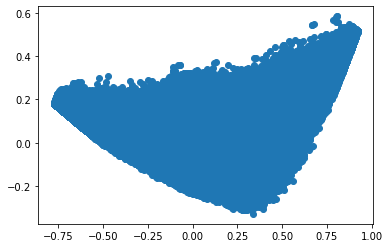

In [ ]:
plt.scatter(rgb_2d['pc1'],rgb_2d['pc2'])

In [84]:
from sklearn.metrics import pairwise_distances
def kmeans(X, k, maxiter, seed = None):
    """
    specify the number of clusters k and
    the maximum iteration to run the algorithm
    """
    n_row, n_col = X.shape

    # randomly choose k data points as initial centroids
    if seed is not None:
        np.random.seed(seed)
    
    rand_indices = np.random.choice(n_row, size = k)
    centroids = X[rand_indices]

    for itr in range(maxiter):
        # compute distances between each data point and the set of centroids
        # and assign each data point to the closest centroid
        distances_to_centroids = pairwise_distances(X, centroids, metric = 'euclidean')
        cluster_assignment = np.argmin(distances_to_centroids, axis = 1)

        # select all data points that belong to cluster i and compute
        # the mean of these data points (each feature individually)
        # this will be our new cluster centroids
        new_centroids = np.array([X[cluster_assignment == i].mean(axis = 0) for i in range(k)])
        
        # if the updated centroid is still the same,
        # then the algorithm converged
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, cluster_assignment

In [ ]:
pc1=rgb_2d['pc1']
pc2=rgb_2d['pc2']
datapoints=[]
for i in range(len(pc1)):
  tmp=(pc1[i],pc2[i])
  datapoints.append(tmp)
dp = np.empty(len(datapoints), dtype=object)
dp[:] = datapoints


In [ ]:
print(datapoints[0])
print(dp[0])

(-0.2528469912902918, -0.07722169491299827)
(-0.2528469912902918, -0.07722169491299827)


In [87]:
pc1=rgb_2d['pc1']
pc2=rgb_2d['pc2']
data=[]
for i in range(len(pc1)):
  tmp=[pc1[i],pc2[i]]
  data.append(tmp)
dpp = np.empty(len(data), dtype=object)
dpp[:] = data
data=np.asarray(data).reshape(262144,2)

centers1,cluster1=kmeans(data,2,20)
centers2,cluster2=kmeans(data,4,20)
centers3,cluster3=kmeans(data,16,20)
centers4,cluster4=kmeans(data,32,20)
centers5,cluster5=kmeans(data,64,20)



In [54]:
def find_result(centers,cluster):
  reds=[]
  greens=[]
  blues=[]
  for i in range(len(img)):
    for j in range(len(img[i])):
      reds.append(img[i][j][0])
      greens.append(img[i][j][1])
      blues.append(img[i][j][2])
  reds2=[0]*len(centers)
  greens2=[0]*len(centers)
  blues2=[0]*len(centers)
  for i in range(len(cluster)):
    for j in range(len(centers)):
      if cluster[i]==j:
        reds2[j]+=reds[i]
        blues2[j]+=blues[i]
        greens2[j]+=greens[i]

  for i in range(len(centers)):
    num1=(cluster==i).sum()
    reds2[i]=reds2[i]/num1
    greens2[i]=greens2[i]/num1
    blues2[i]=blues2[i]/num1
  for i in range(len(cluster)):
    for j in range(len(centers)):
      if cluster[i]==j:
        reds[i]=reds2[j]
        greens[i]=greens2[j]
        blues[i]=blues2[j]
  rgb_res = pd.DataFrame()
  rgb_res['red']=reds
  rgb_res['green']=greens
  rgb_res['blue']=blues
  new_image=rgb_res.iloc[:,:3].values
  new_image=np.asarray(new_image).reshape(512,512,3)
  plt.imshow(new_image)
  plt.title("k="+str(len(centers)))
  plt.show()

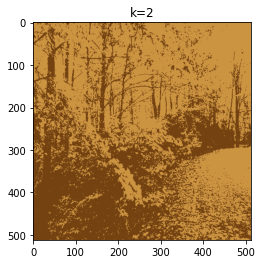

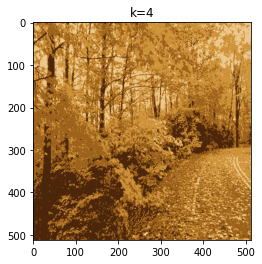

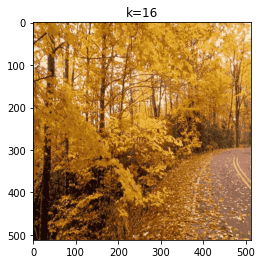

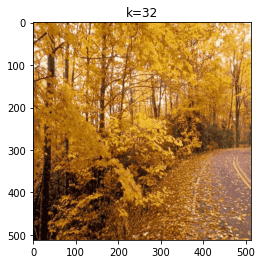

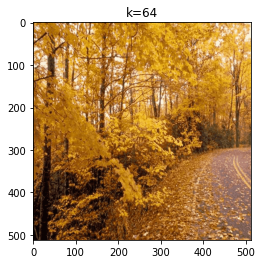

In [88]:
find_result(centers1,cluster1)
find_result(centers2,cluster2)
find_result(centers3,cluster3)
find_result(centers4,cluster4)
find_result(centers5,cluster5)